## Structured Latent Spaces CIFAR10

In [1]:
import torch
import argparse
import CIFAR10_123  
device = "cuda" if torch.cuda.is_available() else "cpu"
args = argparse.Namespace(
    data_path="../data",
    batch_size=512,
    latent_dim=128,
    device=device
)

# Architecture Reasoning

---

## 1. Overview of Our Solution

Our model is a self-supervised autoencoder built on a **ResNet-18 encoder** and trained using a **contrastive learning approach**. The encoder learns meaningful representations from augmented image pairs. Later, we freeze the encoder and train a classifier on top of the learned latent vectors for supervised evaluation.

We used a **SimCLR-style setup** with two different augmentations per image, encouraging the model to learn representations that are invariant to appearance changes. This approach has been shown to work well in recent self-supervised learning literature.

---

## 2. Encoder Architecture Choice (ResNet-18)

We based our encoder on **ResNet-18**, with these adjustments:
- Replaced the 7×7 convolution with a **3×3** kernel.
- Removed the **maxpool** layer to better fit 32×32 CIFAR images.
- Removed the final classification layer (FC), keeping the raw feature vector.

**Why ResNet-18?**
- Deep enough to learn rich features, but efficient on CIFAR-10.
- Residual connections support stable gradient flow.
- Widely adopted for transfer learning and self-supervised tasks.

**Alternatives Considered:** Simpler CNNs were considered, but ResNet-18 provided a better tradeoff between performance and complexity.

---

## 3. Projection Head

The output of the encoder is passed into a **2-layer projection head**:
- Structure: `feature_dim → 512 → 128`
- Activation: ReLU in between

**Why use a projection head?**
- As shown in SimCLR, projecting features before the contrastive loss improves representation quality.
- Helps separate the learning of representations from the contrastive task space.

---

## 4. Contrastive Learning Approach 

We trained the encoder and projection head using the **NT-Xent loss**:
- **Positive pairs**: two augmented views of the same image
- **Negative pairs**: all other samples in the batch
- **Similarity metric**: cosine similarity scaled by temperature (`τ=0.1`)

**Why contrastive loss?**
- It encourages the model to cluster similar samples and push away different ones.
- Doesn’t require labels — useful for self-supervised learning.
- Proven to produce transferable features for classification tasks.

---

## 5. Classifier Head 

After training the encoder, we **froze its weights** and trained a **classifier** on top of the projected embeddings:
- Architecture: `128 → 256 → 128 → 10`
- Activations: ReLU after each layer
- Output layer: LogSoftmax with NLLLoss

**Why this design?**
- Simple yet expressive enough to classify CIFAR-10 with pretrained features.
- Follows the standard SimCLR linear evaluation protocol.

---

## 6. Evaluation 

- The classifier was trained and validated over multiple epochs.
- We plotted **train/val accuracy** and **train/val loss** to track progress.
- Evaluation was done using a held-out **test set**, but only for reporting purposes.
- Performance was measured **without fine-tuning the encoder**.

---

## 7. Parameter Choices

| Parameter       | Choice            | Why                                                                 |
|-----------------|-------------------|----------------------------------------------------------------------|
| Latent Dim      | 128               | Compact yet expressive representations                              |
| Batch Size      | 512               | Works well on available hardware; fits in memory                    |
| Learning Rate   | 0.001             | Stable with Adam optimizer                                          |
| Weight Decay    | 1e-6              | Prevents overfitting in projection head                             |
| Scheduler       | StepLR (10, 0.6)  | Reduces LR to fine-tune in later epochs                             |
| Optimizer       | Adam              | Fast convergence and adaptive to gradients                          |

---

## 8. Validation Use

- Training set was split into **90% train / 10% validation**.
- Used validation loss for both contrastive and classification stages.
- Plotted all metrics to verify learning and prevent overfitting.
- Ensured consistent generalization before test-time evaluation.

---

## 9. Summary

We implemented a contrastive autoencoder using a ResNet-18 encoder and a lightweight projection MLP. By freezing the encoder and training a separate classifier, we validated that the representations learned are both general and effective. The design balances simplicity with performance and follows best practices from the SimCLR framework.


In [2]:
train_loader, val_loader, test_loader = CIFAR10_123.load_data(args)
autoencoder = CIFAR10_123.Autoencoder(latent_dim=args.latent_dim).to(args.device)

Files already downloaded and verified


Files already downloaded and verified


## Training Autoencoder

Epoch [1/30] - Train Loss: 6.1046 | Val Loss: 5.5568 | Test Loss: 3.6590


Epoch [2/30] - Train Loss: 5.0809 | Val Loss: 4.8523 | Test Loss: 2.4536


Epoch [3/30] - Train Loss: 4.3259 | Val Loss: 4.2186 | Test Loss: 1.7159


Epoch [4/30] - Train Loss: 3.8606 | Val Loss: 3.9693 | Test Loss: 1.6642


Epoch [5/30] - Train Loss: 3.5536 | Val Loss: 3.5448 | Test Loss: 1.2618


Epoch [6/30] - Train Loss: 3.3000 | Val Loss: 3.2292 | Test Loss: 1.1275


Epoch [7/30] - Train Loss: 3.1166 | Val Loss: 3.1746 | Test Loss: 1.1567


Epoch [8/30] - Train Loss: 3.0016 | Val Loss: 3.0473 | Test Loss: 1.0426


Epoch [9/30] - Train Loss: 2.8789 | Val Loss: 2.9120 | Test Loss: 0.9969


Epoch [10/30] - Train Loss: 2.7993 | Val Loss: 2.8751 | Test Loss: 1.0098


Epoch [11/30] - Train Loss: 2.6424 | Val Loss: 2.6682 | Test Loss: 0.9287


Epoch [12/30] - Train Loss: 2.5981 | Val Loss: 2.6878 | Test Loss: 0.9094


Epoch [13/30] - Train Loss: 2.5693 | Val Loss: 2.6191 | Test Loss: 0.8931


Epoch [14/30] - Train Loss: 2.5366 | Val Loss: 2.5167 | Test Loss: 0.8933


Epoch [15/30] - Train Loss: 2.5094 | Val Loss: 2.5679 | Test Loss: 0.9296


Epoch [16/30] - Train Loss: 2.4819 | Val Loss: 2.6093 | Test Loss: 0.9023


Epoch [17/30] - Train Loss: 2.4413 | Val Loss: 2.4487 | Test Loss: 0.8845


Epoch [18/30] - Train Loss: 2.4178 | Val Loss: 2.4986 | Test Loss: 0.8781


Epoch [19/30] - Train Loss: 2.3883 | Val Loss: 2.3989 | Test Loss: 0.8872


Epoch [20/30] - Train Loss: 2.3838 | Val Loss: 2.4198 | Test Loss: 0.8738


Epoch [21/30] - Train Loss: 2.3014 | Val Loss: 2.3590 | Test Loss: 0.8446


Epoch [22/30] - Train Loss: 2.2866 | Val Loss: 2.2872 | Test Loss: 0.8475


Epoch [23/30] - Train Loss: 2.2765 | Val Loss: 2.2748 | Test Loss: 0.8352


Epoch [24/30] - Train Loss: 2.2571 | Val Loss: 2.3382 | Test Loss: 0.8653


Epoch [25/30] - Train Loss: 2.2449 | Val Loss: 2.3143 | Test Loss: 0.8477


Epoch [26/30] - Train Loss: 2.2291 | Val Loss: 2.2512 | Test Loss: 0.8349


Epoch [27/30] - Train Loss: 2.2299 | Val Loss: 2.3087 | Test Loss: 0.8385


Epoch [28/30] - Train Loss: 2.2167 | Val Loss: 2.2958 | Test Loss: 0.8336


Epoch [29/30] - Train Loss: 2.1918 | Val Loss: 2.2650 | Test Loss: 0.8430


Epoch [30/30] - Train Loss: 2.1973 | Val Loss: 2.2849 | Test Loss: 0.8472


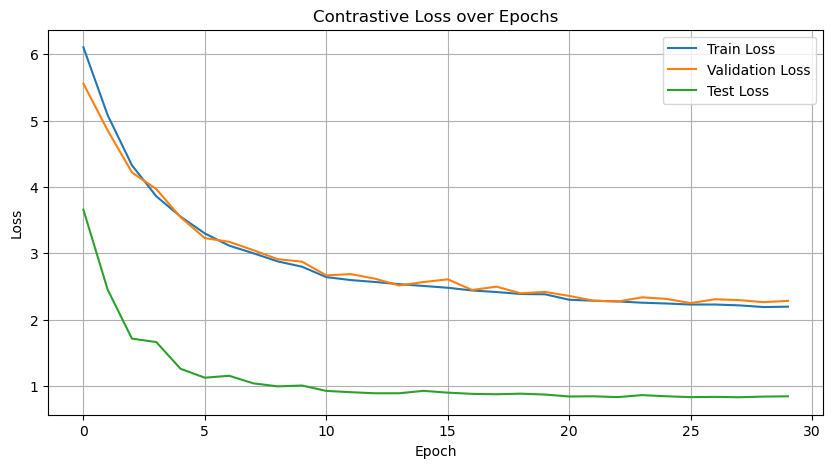

In [3]:
CIFAR10_123.train_autoencoder(autoencoder, train_loader, val_loader, test_loader,args,epochs=30)

# Contrastive Learning Results  
---

## 1. Training Objective

We trained the encoder using **contrastive loss** only — no labels.  
The goal was to group augmented views of the same image and push apart others in latent space.

- Loss: NT-Xent (temperature = 0.1)  
- Representations were learned in a self-supervised way  
- Encoder was **frozen** after training for classification

---

## 2. Contrastive Loss Values (30 Epochs)

| Epoch | Train Loss | Val Loss | Test Loss |
|-------|------------|----------|-----------|
| 1     | 6.10       | 5.56     | 3.66      |
| 10    | 2.80       | 2.88     | 1.01      |
| 20    | 2.38       | 2.42     | 0.87      |
| 30    | 2.20       | 2.28     | 0.85      |

---

## 3. What We Learned

1. **Pure Contrastive Training Works**  
   - The model learns even without using any labels  
   - Loss consistently decreases, showing stable training

2. **Test Loss Improved a Lot**  
   - Dropped from **3.66 → 0.85** over 30 epochs  
   - Indicates that representations became more consistent and class-aware

---

## 4. Summary

Contrastive learning allowed us to train a powerful encoder in a completely self-supervised way.  
The loss curve shows that the encoder gradually grouped similar views and separated different ones, leading to strong features ready for downstream tasks.


## Training Classifier

Epoch [1/30] | Train Acc: 56.13%, Loss: 1.3506 | Val Acc: 62.09%, Loss: 1.0871 | Test Acc: 68.89%, Loss: 0.8923


Epoch [2/30] | Train Acc: 62.78%, Loss: 1.0568 | Val Acc: 62.70%, Loss: 1.0682 | Test Acc: 70.00%, Loss: 0.8542


Epoch [3/30] | Train Acc: 63.59%, Loss: 1.0272 | Val Acc: 64.28%, Loss: 1.0287 | Test Acc: 70.64%, Loss: 0.8266


Epoch [4/30] | Train Acc: 64.81%, Loss: 1.0043 | Val Acc: 64.67%, Loss: 0.9990 | Test Acc: 71.16%, Loss: 0.8091


Epoch [5/30] | Train Acc: 65.60%, Loss: 0.9790 | Val Acc: 65.15%, Loss: 0.9919 | Test Acc: 72.10%, Loss: 0.7925


Epoch [6/30] | Train Acc: 65.70%, Loss: 0.9773 | Val Acc: 64.65%, Loss: 0.9898 | Test Acc: 71.71%, Loss: 0.7970


Epoch [7/30] | Train Acc: 66.22%, Loss: 0.9637 | Val Acc: 64.21%, Loss: 1.0012 | Test Acc: 72.45%, Loss: 0.7851


Epoch [8/30] | Train Acc: 66.13%, Loss: 0.9644 | Val Acc: 65.10%, Loss: 0.9926 | Test Acc: 72.64%, Loss: 0.7787


Epoch [9/30] | Train Acc: 66.55%, Loss: 0.9500 | Val Acc: 65.21%, Loss: 0.9866 | Test Acc: 72.34%, Loss: 0.7790


Epoch [10/30] | Train Acc: 66.43%, Loss: 0.9486 | Val Acc: 64.04%, Loss: 1.0150 | Test Acc: 72.38%, Loss: 0.7767


Epoch [11/30] | Train Acc: 66.91%, Loss: 0.9446 | Val Acc: 65.62%, Loss: 0.9803 | Test Acc: 72.76%, Loss: 0.7706


Epoch [12/30] | Train Acc: 66.94%, Loss: 0.9346 | Val Acc: 66.15%, Loss: 0.9683 | Test Acc: 72.88%, Loss: 0.7664


Epoch [13/30] | Train Acc: 67.00%, Loss: 0.9302 | Val Acc: 65.54%, Loss: 0.9732 | Test Acc: 72.42%, Loss: 0.7755


Epoch [14/30] | Train Acc: 67.50%, Loss: 0.9273 | Val Acc: 65.93%, Loss: 0.9809 | Test Acc: 73.21%, Loss: 0.7623


Epoch [15/30] | Train Acc: 67.58%, Loss: 0.9221 | Val Acc: 66.84%, Loss: 0.9637 | Test Acc: 73.11%, Loss: 0.7683


Epoch [16/30] | Train Acc: 67.32%, Loss: 0.9239 | Val Acc: 66.19%, Loss: 0.9590 | Test Acc: 73.16%, Loss: 0.7608


Epoch [17/30] | Train Acc: 67.47%, Loss: 0.9243 | Val Acc: 65.78%, Loss: 0.9774 | Test Acc: 73.26%, Loss: 0.7586


Epoch [18/30] | Train Acc: 67.83%, Loss: 0.9149 | Val Acc: 66.45%, Loss: 0.9508 | Test Acc: 73.12%, Loss: 0.7581


Epoch [19/30] | Train Acc: 67.45%, Loss: 0.9182 | Val Acc: 66.36%, Loss: 0.9594 | Test Acc: 73.36%, Loss: 0.7575


Epoch [20/30] | Train Acc: 67.84%, Loss: 0.9133 | Val Acc: 65.99%, Loss: 0.9557 | Test Acc: 73.58%, Loss: 0.7576


Epoch [21/30] | Train Acc: 67.96%, Loss: 0.9085 | Val Acc: 67.56%, Loss: 0.9414 | Test Acc: 73.40%, Loss: 0.7593


Epoch [22/30] | Train Acc: 68.22%, Loss: 0.9048 | Val Acc: 66.45%, Loss: 0.9525 | Test Acc: 73.13%, Loss: 0.7622


Epoch [23/30] | Train Acc: 67.88%, Loss: 0.9071 | Val Acc: 65.26%, Loss: 0.9834 | Test Acc: 73.44%, Loss: 0.7574


Epoch [24/30] | Train Acc: 68.05%, Loss: 0.9032 | Val Acc: 66.47%, Loss: 0.9611 | Test Acc: 73.69%, Loss: 0.7532


Epoch [25/30] | Train Acc: 68.50%, Loss: 0.8963 | Val Acc: 66.21%, Loss: 0.9478 | Test Acc: 73.10%, Loss: 0.7547


Epoch [26/30] | Train Acc: 68.51%, Loss: 0.9016 | Val Acc: 66.06%, Loss: 0.9669 | Test Acc: 73.72%, Loss: 0.7530


Epoch [27/30] | Train Acc: 68.41%, Loss: 0.8927 | Val Acc: 65.39%, Loss: 0.9862 | Test Acc: 73.42%, Loss: 0.7524


Epoch [28/30] | Train Acc: 68.62%, Loss: 0.8960 | Val Acc: 66.30%, Loss: 0.9748 | Test Acc: 73.13%, Loss: 0.7557


Epoch [29/30] | Train Acc: 68.46%, Loss: 0.8934 | Val Acc: 66.86%, Loss: 0.9399 | Test Acc: 73.61%, Loss: 0.7518


Epoch [30/30] | Train Acc: 68.39%, Loss: 0.8943 | Val Acc: 65.58%, Loss: 0.9753 | Test Acc: 73.12%, Loss: 0.7497


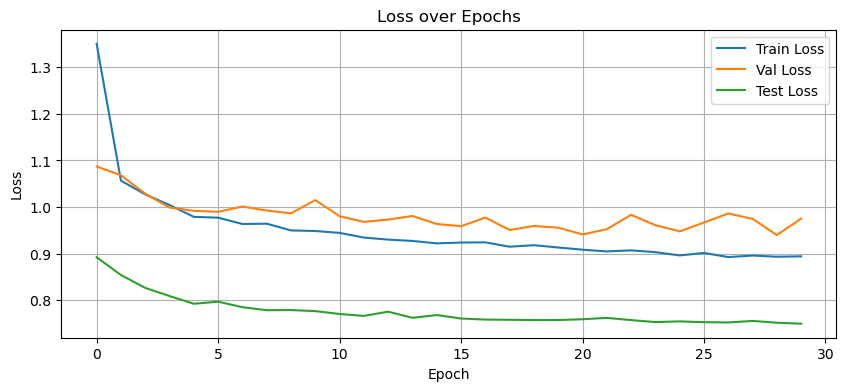

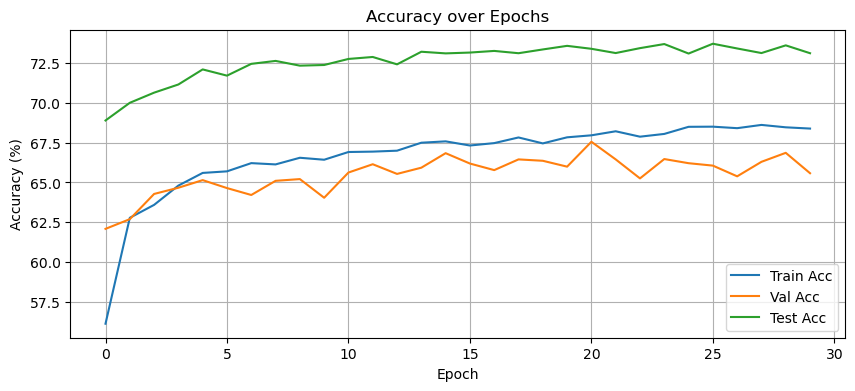

In [4]:
classifier = CIFAR10_123.train_classifier(autoencoder, train_loader, val_loader, test_loader, args,epochs=30)

## Classifier Evaluation on Frozen Encoder  
---

After training the encoder with contrastive loss, we **froze its weights**  
and trained a simple classifier on top of the learned representations.

| Epoch | Train Accuracy | Val Accuracy | Test Accuracy |
|-------|----------------|--------------|----------------|
| 1     | 56.13%         | 62.09%       | 68.89%         |
| 10    | 66.43%         | 64.04%       | 72.38%         |
| 20    | 67.84%         | 65.99%       | 73.58%         |
| 30    | 68.39%         | 65.58%       | 73.12%         |

---

### What We Learned:

1. **Strong Representation Quality**  
   - Even with a frozen encoder, we reached **~73.7%** test accuracy  
   - This is **better than 1.2.1** and very close to 1.2.2 — without any label usage in encoder training

2. **Stable Learning Curve**  
   - Train, val, and test curves stayed close  
   - Confirms **low overfitting** and **good generalization**

3. **Contrastive > Reconstruction**  
   - Compared to reconstruction-only in 1.2.1, contrastive learning produced **much better encodings for classification**


## t-SNE Analysis of Latent Spaces

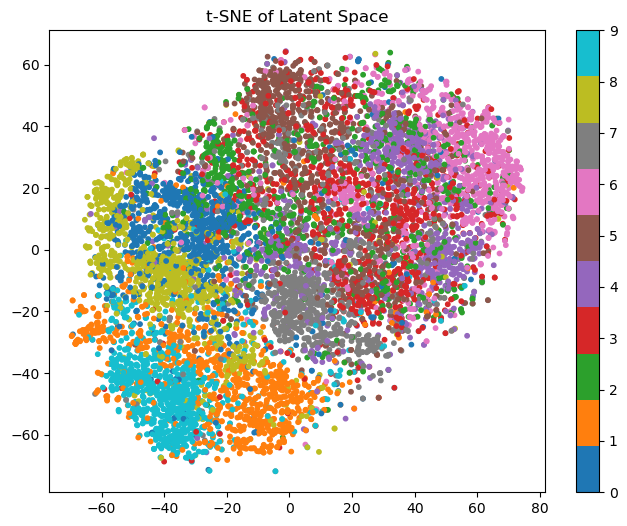

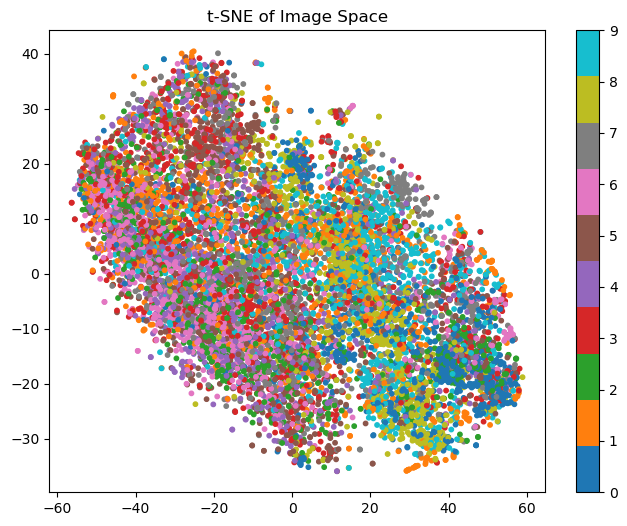

In [5]:
CIFAR10_123.plot_tsne(autoencoder, test_loader, args.device)

## t-SNE Visualization  
---

### Latent Space
- Points with the same color (same class) are **grouped together**  
- This means the model **learned to tell the classes apart**
- Clusters are **more separate** and **clean**

---

### Image Space
- All the points are **mixed up**  
- Different classes overlap a lot  
- This shows that the **original images** are not easy to separate without learning

---

### Why This Matters
- The encoder **created a smart feature space**  
- Makes it easier for the classifier to learn and do better  
- Shows the power of **contrastive learning** in organizing data

###  t-SNE Visualizations: What We See in the 3 Models

---

#### 1.2.1 — No Contrastive Learning (Autoencoder Only)

- **Latent Space**: Mixed, blurry, and hard to separate.
- **Image Space**: Almost random — no visible class clusters.
- **Why?**  
  The encoder was trained **only to reconstruct images**, not to group similar ones.  
  So the latent space does **not reflect class differences** well.

---

#### 1.2.2 — Supervised Training

- **Latent Space**: Very clear clusters — each color (class) is mostly grouped.
- **Image Space**: Still mixed, but better than before.
- **Why?**  
  The encoder was trained **with labels**, so it learned to **separate classes** clearly.  
  This is the best result because we gave it direct information about the task.

---

#### 1.2.3 — Self-Supervised with Contrastive Loss

- **Latent Space**: Clusters start to form, but not as sharp as in 1.2.2.
- **Image Space**: Better than 1.2.1 but still messy.
- **Why?**  
  This model learned **without any labels**, using only contrast between augmented views.  
  It shows that contrastive learning helps create **useful and somewhat grouped embeddings**, even without knowing the class.

---

Self-supervised learning (1.2.3) is **impressive**, considering it does all this **without labels**!
